In [15]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft, ifft
from ffs import FFS
import seaborn as sns

sns.set_style("whitegrid")

%matplotlib inline

/home/jbhersch/anaconda2/lib/python2.7/site-packages/numpy/core/numeric.py:482: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


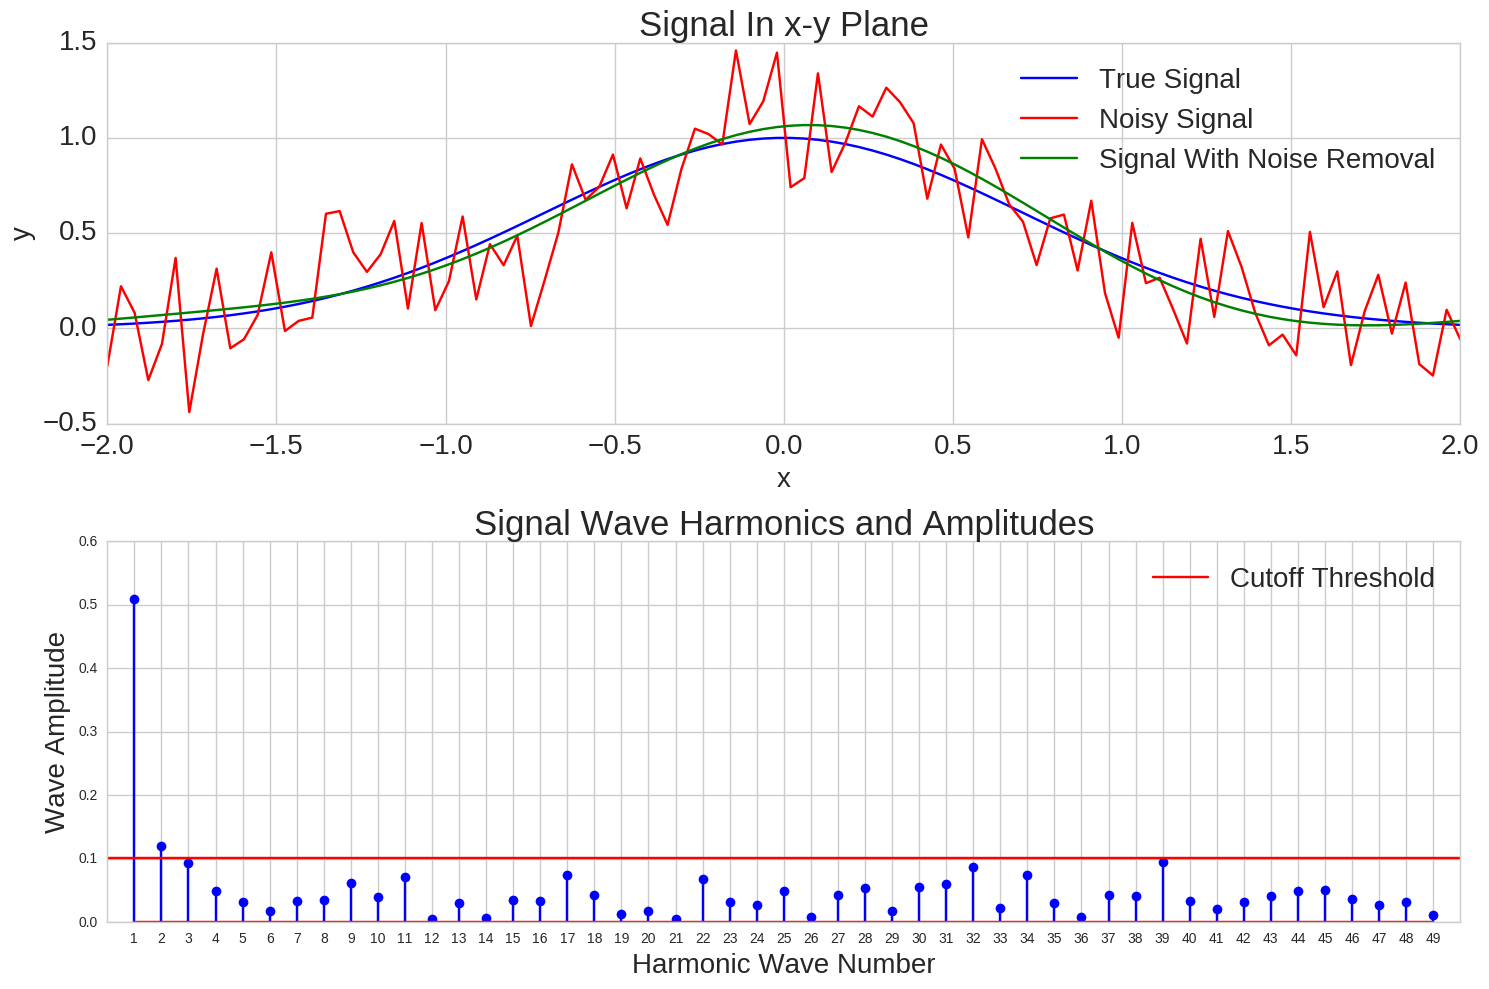

In [2]:
num_points = 100
np.random.seed(123)
x = np.linspace(-2,2,num_points)
amplitude = 0.2
# noise = amplitude*np.random.uniform(low = -1, high = 1, size=num_points)
noise = amplitude*np.random.normal(loc=0, scale=1, size=num_points)
y = np.exp(-x**2)
y_noise = y + noise

thresh = 0.2
fs = FFS(x, y_noise, thresh = thresh)
ffs = FFS(x, y_noise)

yt = fft(y_noise)
yt = 2*np.absolute(yt[1:len(yt)/2])/(len(y))

plt.figure(figsize=(15,10))

plt.subplot(2,1,1)
plt.plot(x, y,'b',label="True Signal")
plt.plot(x, y_noise,'r',label="Noisy Signal")
plt.plot(x, fs.y, 'g', label="Signal With Noise Removal")
# plt.plot(x, ffs.evaluate(x,4), 'k', label="Signal With Noise Removal", linewidth=5, alpha=0.25)
plt.xlabel('x', fontsize=20)
plt.xticks(fontsize=20)
plt.ylabel('y', fontsize=20)
plt.yticks(fontsize=20)
plt.title("Signal In x-y Plane", fontsize=25)
plt.legend(loc = 'upper right', prop={'size':20})

plt.subplot(2,1,2)
plt.stem(range(1,len(yt)+1), np.abs(yt))
plt.xticks(range(1,len(yt)+1))
plt.xlabel("Harmonic Wave Number", fontsize = 20)
plt.ylabel("Wave Amplitude", fontsize = 20)
plt.title("Signal Wave Harmonics and Amplitudes", fontsize=25)
plt.axhline(y=thresh*np.max(yt), color='r', linestyle='-',label="Cutoff Threshold")
plt.legend(loc = 'upper right', prop={'size':20})

plt.tight_layout()
# plt.savefig('images/bell_curve_random_normal_noise_removal.png')
plt.show()

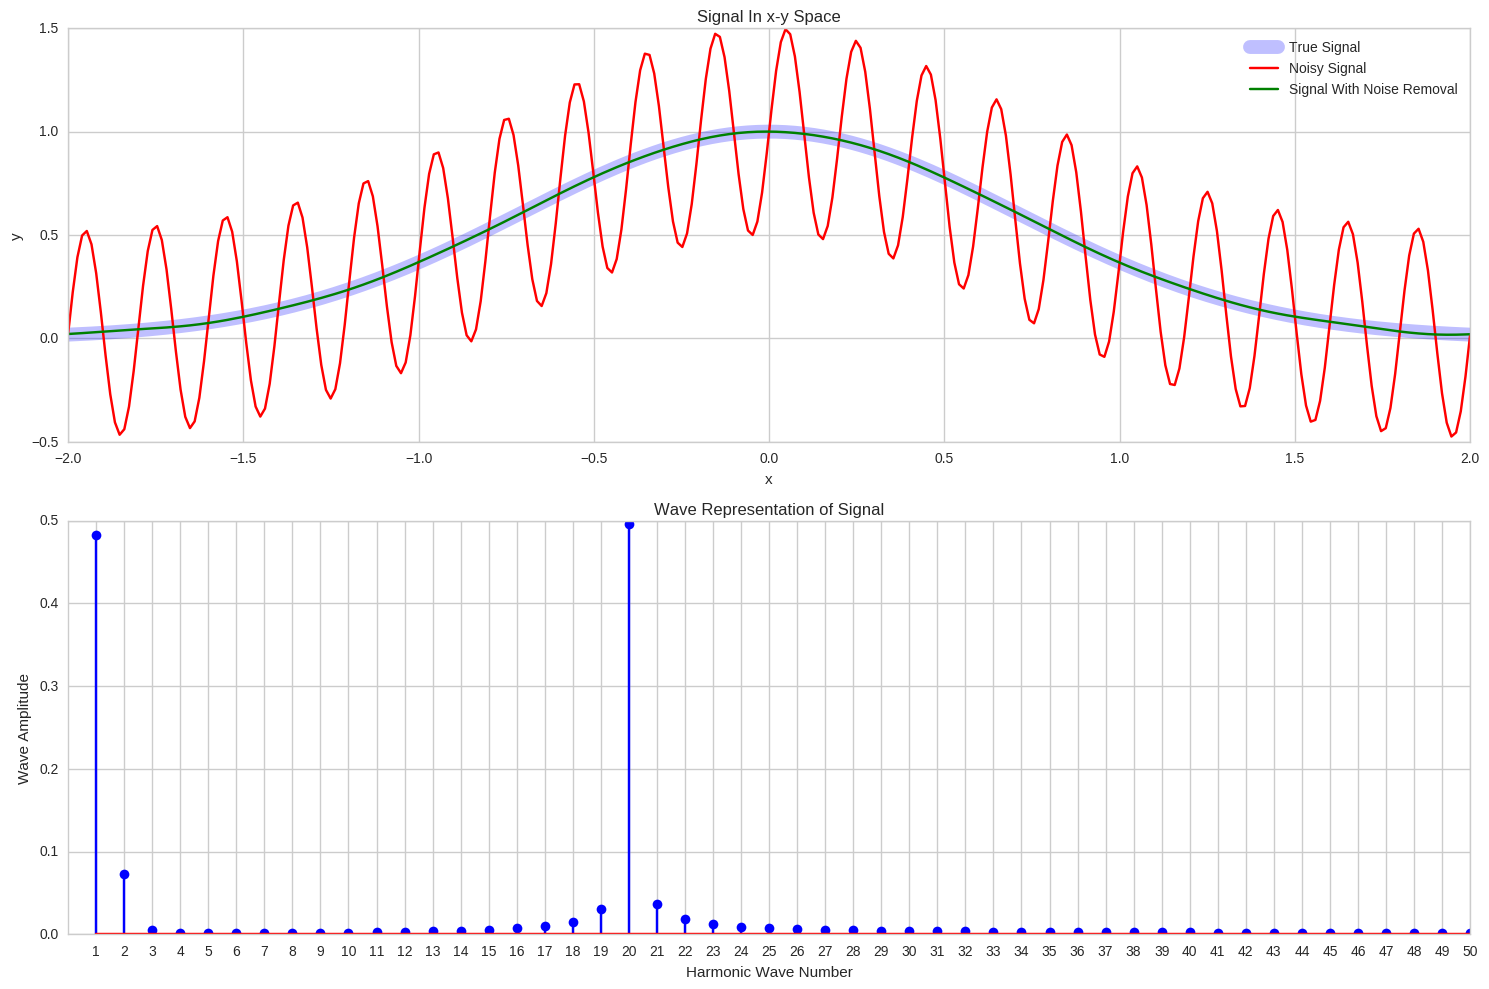

In [3]:
num_points = 300

xa = -2
xb = 2
L = xb - xa

x = np.linspace(xa,xb,num_points)
y = np.exp(-x**2)
omega = 2*np.pi/L
wave_number = 20
amplitude = 0.5
noise = amplitude*np.sin(wave_number*omega*(x-xa))
y_noise = y + noise
fs = FFS(x, y_noise)

yt = fft(y_noise)
yyt = yt.copy()
yyt[3:-1] = np.complex(0,0)
# yt = 2*np.absolute(yt[1:len(yt)/2])/(len(y)-1)
yt = 2*np.absolute(yt[1:len(yt)/2])/(len(y))

plt.figure(figsize=(15,10))

plt.subplot(2,1,1)
plt.plot(x, y,'b',label="True Signal",linewidth=10, alpha=0.25)
plt.plot(x, y_noise,'r',label="Noisy Signal")
# plt.plot(x, ifft(yyt), 'g')
plt.plot(x, fs.evaluate(x, 10), 'g', label="Signal With Noise Removal")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Signal In x-y Space")
plt.legend()

plt.subplot(2,1,2)
plt.stem(range(1,51), np.abs(yt[:50]))
plt.xticks(range(1,51))
plt.xlabel("Harmonic Wave Number")
plt.ylabel("Wave Amplitude")
plt.title("Wave Representation of Signal")

plt.tight_layout()
plt.show()

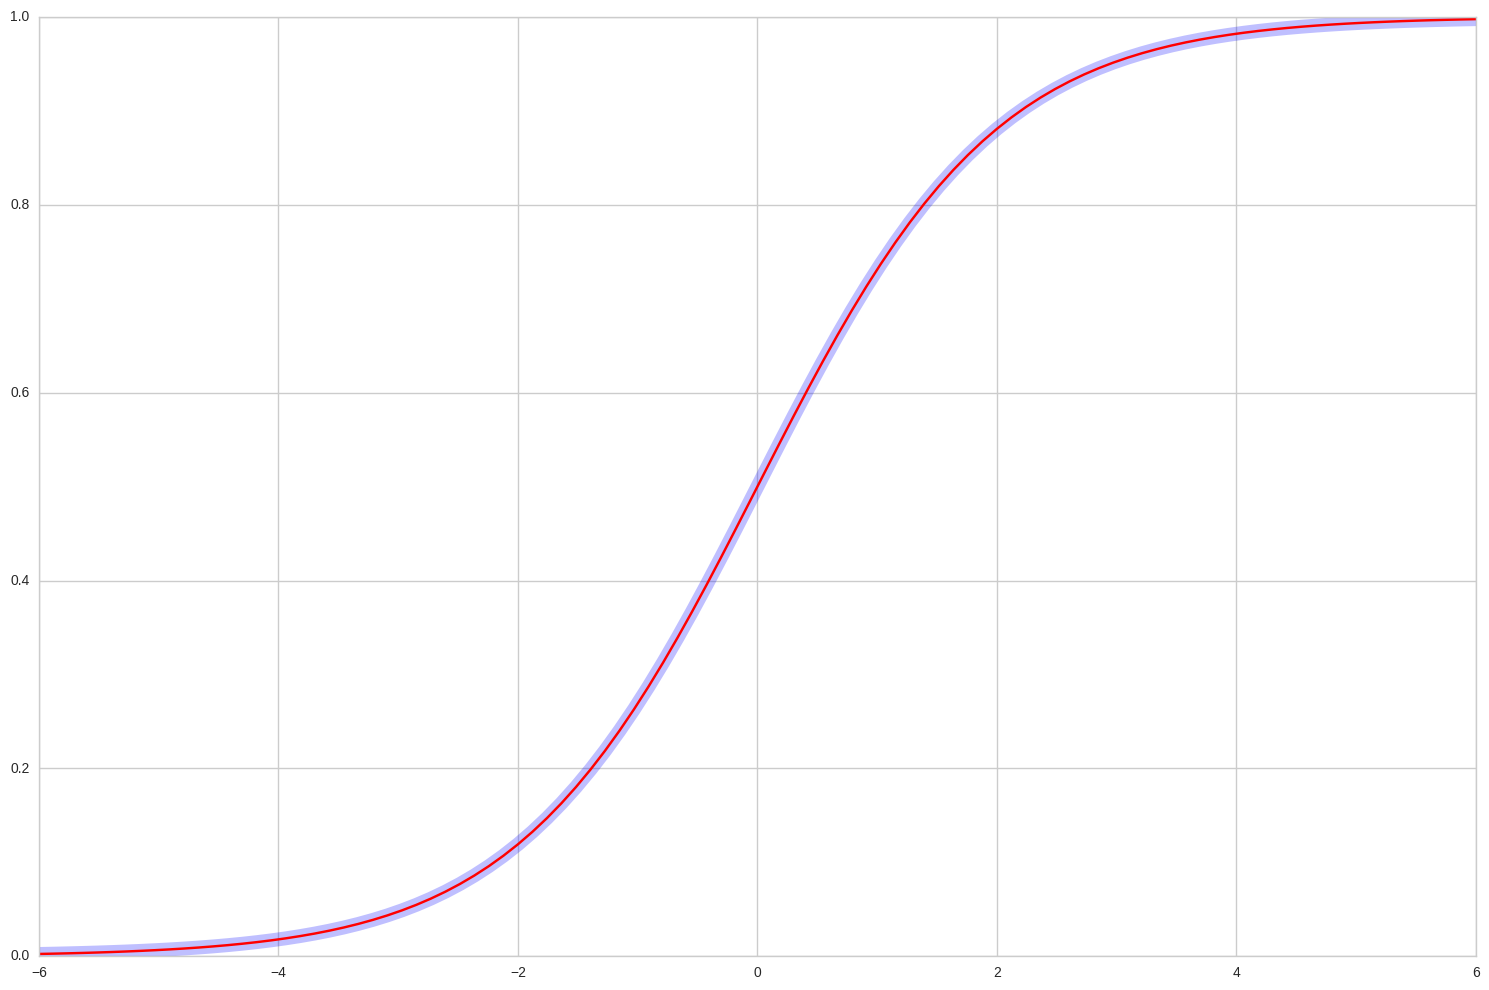

In [4]:
x = np.linspace(-6,6,100)
y = 1/(1+np.exp(-x))

fs = FFS(x,y,100)

plt.figure(figsize=(15,10))
plt.plot(x,y,'b',linewidth=10,alpha=0.25)
plt.plot(x,fs.evaluate(x),'r')
plt.tight_layout()
plt.show()

numpy.ndarray

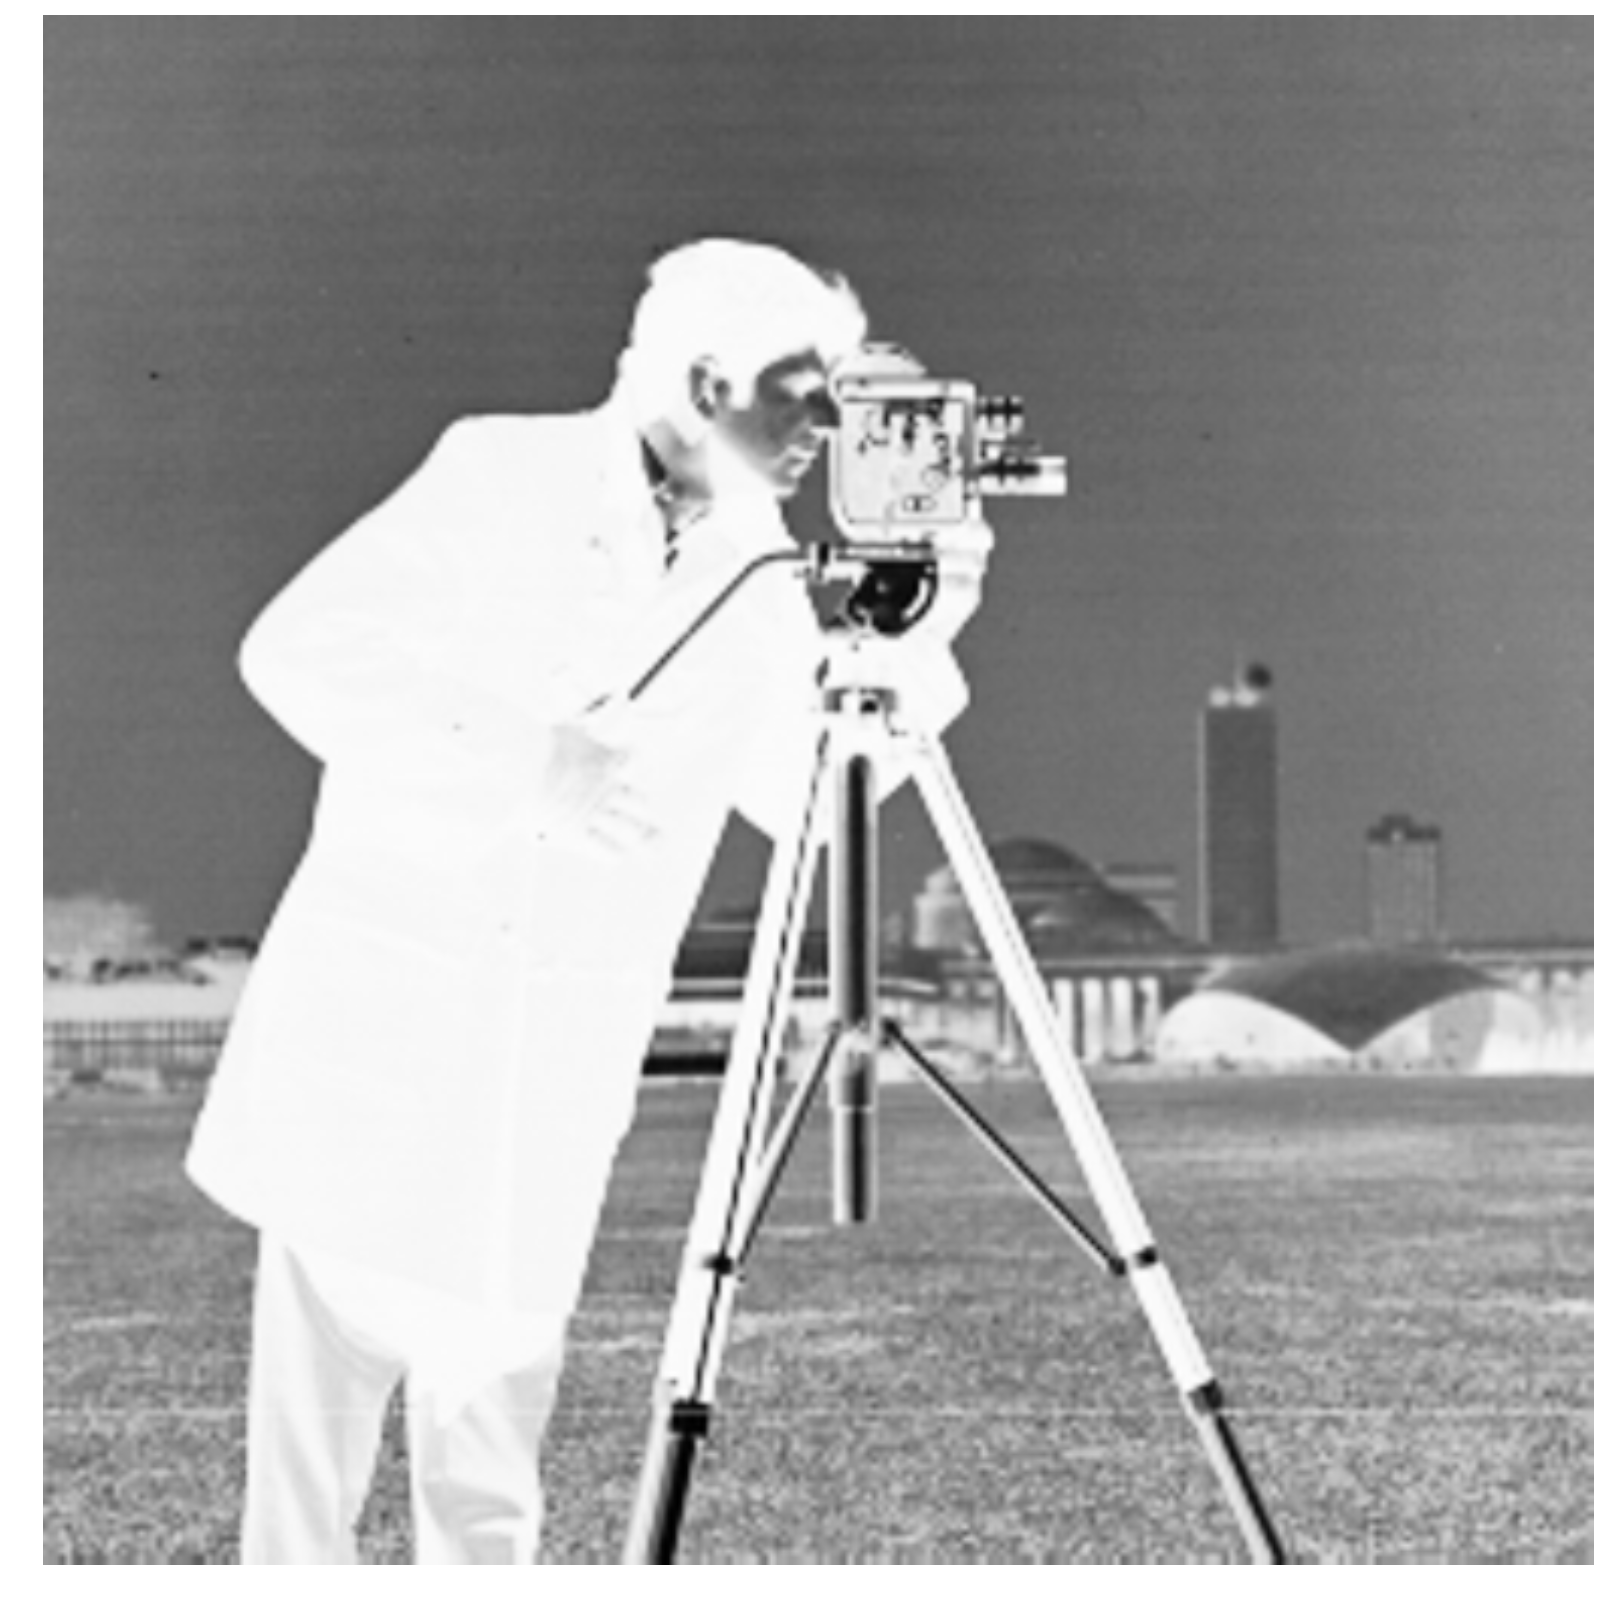

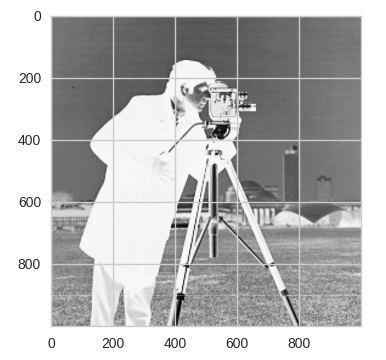

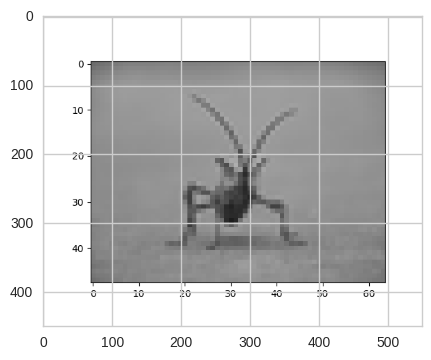

(2000, 2000)

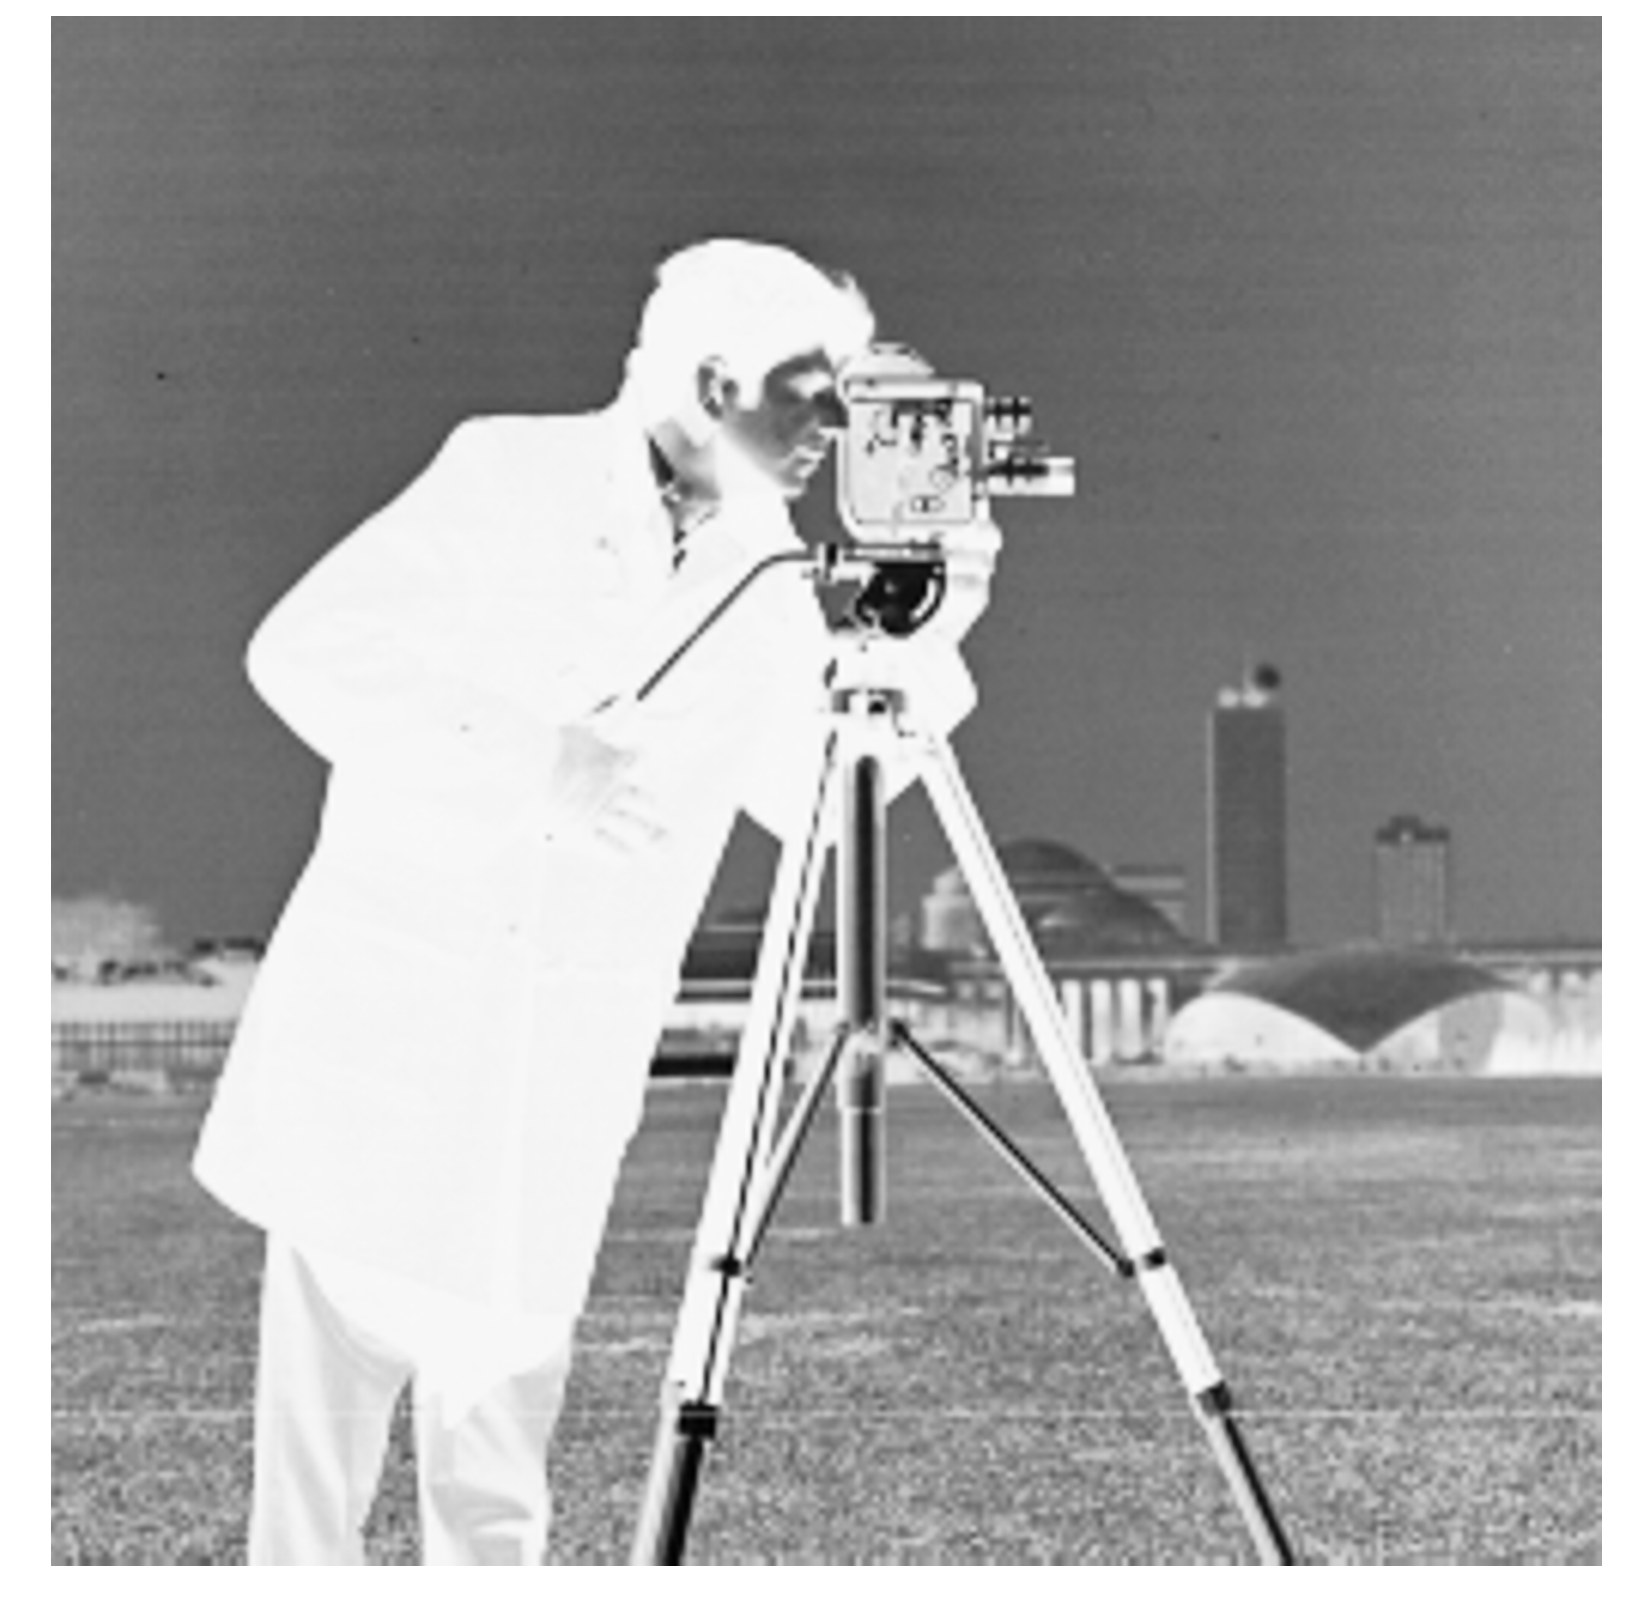

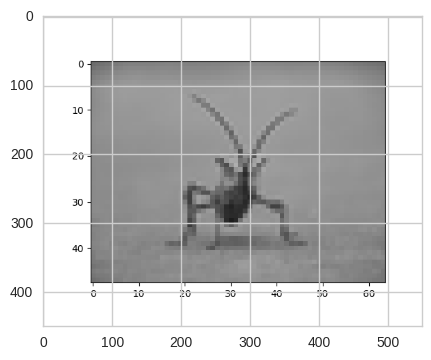

In [33]:
len(np.array(img).shape)

3

In [34]:
len(camera.shape)

2

In [46]:
c3 = refine_image(camera, 50, 50)

In [47]:
c3.shape

(50, 50)

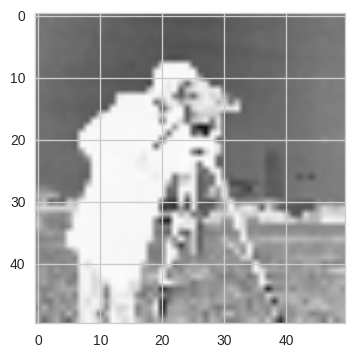

In [48]:
plt.imshow(c3)

In [43]:
c3[:,:,0].shape

(50, 50)

In [45]:
np.array(img).shape

(450, 550, 4)

In [63]:
img2 = refine_image(np.array(img), 600, 600)

In [64]:
img2.shape

(600, 600, 4)